In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
df_train=df_train.drop(['MiscFeature','Alley','Fence','PoolQC'],axis=1)

In [6]:
df_train.shape

(1460, 77)

In [7]:
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [8]:
df_train=df_train.drop(['FireplaceQu'],axis=1)

In [9]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
LotFrontage,259,0.177519
GarageType,81,0.055517
GarageYrBlt,81,0.055517
GarageFinish,81,0.055517
GarageCond,81,0.055517
GarageQual,81,0.055517
BsmtExposure,38,0.026045
BsmtFinType2,38,0.026045
BsmtFinType1,37,0.025360
BsmtCond,37,0.025360


In [10]:
#lot frontage is continuous value
mean_lot_frontage= df_train['LotFrontage'].mean()
print(mean_lot_frontage)
df_train['LotFrontage']=df_train['LotFrontage'].fillna(mean_lot_frontage)

70.0475


In [11]:
#GarageType is categorical
mode_GarageType=df_train['GarageType'].mode()
print(mode_GarageType)
df_train['GarageType']=df_train['GarageType'].fillna('Attchd')

0    Attchd
dtype: object


In [12]:
#GarageYrBlt is continuous value
mean_GarageYrBlt= df_train['GarageYrBlt'].mean()
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(mean_GarageYrBlt)

In [13]:
#GarageFinish is categorical
mode_GarageFinish=df_train['GarageFinish'].mode()
print(mode_GarageFinish)
df_train['GarageFinish']=df_train['GarageFinish'].fillna('Unf')

0    Unf
dtype: object


In [14]:
#GarageQual is categorical
mode_GarageQual=df_train['GarageQual'].mode()
print(mode_GarageQual)
df_train['GarageQual']=df_train['GarageQual'].fillna('TA')

0    TA
dtype: object


In [15]:
#GarageCond is categorical
mode_GarageCond=df_train['GarageCond'].mode()
print(mode_GarageCond)
df_train['GarageCond']=df_train['GarageCond'].fillna('TA')

0    TA
dtype: object


In [16]:
#BsmtQual is categorical
mode_bsmtQual=df_train['BsmtQual'].mode()
print(mode_bsmtQual)
df_train['BsmtQual']=df_train['BsmtQual'].fillna('TA')

0    TA
dtype: object


In [17]:
#BsmtCond is categorical
mode_bsmtcond=df_train['BsmtCond'].mode()
print(mode_bsmtcond)
df_train['BsmtCond']=df_train['BsmtCond'].fillna('TA')

0    TA
dtype: object


In [18]:
#BsmtExposure is categorical
mode_bsmtexp=df_train['BsmtExposure'].mode()
print(mode_bsmtexp)
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna('No')

0    No
dtype: object


In [19]:
#BsmtFinType1 is categorical
mode_bsmtfin1=df_train['BsmtFinType1'].mode()
print(mode_bsmtfin1)
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna('Unf')

0    Unf
dtype: object


In [20]:
#BsmtFinType2 is categorical
mode_bsmtfin2=df_train['BsmtFinType2'].mode()
print(mode_bsmtfin2)
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna('Unf')

0    Unf
dtype: object


In [21]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MasVnrType,8,0.005483
MasVnrArea,8,0.005483
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000


In [22]:
df_train = df_train.drop(df_train.loc[df_train['MasVnrType'].isnull()].index)

In [23]:
df_train = df_train.drop(df_train.loc[df_train['MasVnrArea'].isnull()].index)

In [24]:
-df_train.isnull().sum().sort_values()

Id               0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
Fireplaces       0
HeatingQC        0
GarageType       0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
                ..
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
LotFrontage      0
MSZoning         0
MSSubClass       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF2       0
BsmtFinType2     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
SaleCondition    0
Foundation       0
ExterQual   

In [25]:
all_column = list(df_train.columns)
numeric_col = list(df_train._get_numeric_data().columns )
categorical_columns =  list(set(all_column) - set(numeric_col))
print(numeric_col)
print(categorical_columns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['BsmtCond', 'BsmtExposure', 'Functional', 'BsmtFinType1', 'LotShape', 'GarageType', 'LotConfig', 'ExterCond', 'PavedDrive', 'Utilities', 'CentralAir', 'GarageQual', 'RoofMatl', 'Exterior2nd', 'Street', 'BsmtQual', 'KitchenQual', 'Electrical', 'RoofStyle', 'GarageCond', 'Neighborhood', 'Heating', 'GarageFinish', 'MasVnrType', 'ExterQual', 'Condition2', 'SaleType', 'HeatingQC', 'MSZoning', 'LandSlope', 'Condition1', 'BsmtFinType2', 'BldgType', 'Foundation', 'SaleCondition', 'H

In [26]:
df_train['KitchenQual'].value_counts()


TA    734
Gd    579
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [27]:
df_train_cat=df_train.loc[:,categorical_columns]

In [28]:
for col in list(set(categorical_columns)):
    print(df_train[col].value_counts())

TA    1340
Gd      64
Fa      45
Po       2
Name: BsmtCond, dtype: int64
No    983
Av    221
Gd    133
Mn    114
Name: BsmtExposure, dtype: int64
Unf    464
GLQ    413
ALQ    220
BLQ    148
Rec    132
LwQ     74
Name: BsmtFinType1, dtype: int64
Typ     1352
Min2      34
Min1      31
Mod       15
Maj1      13
Maj2       5
Sev        1
Name: Functional, dtype: int64
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Attchd     944
Detchd     387
BuiltIn     86
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
TA    1273
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Y    1331
N      90
P      30
Name: PavedDrive, dtype: int64
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64
Y    1356
N      95
Name: CentralAir, dtype: int64
TA    1383
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual,

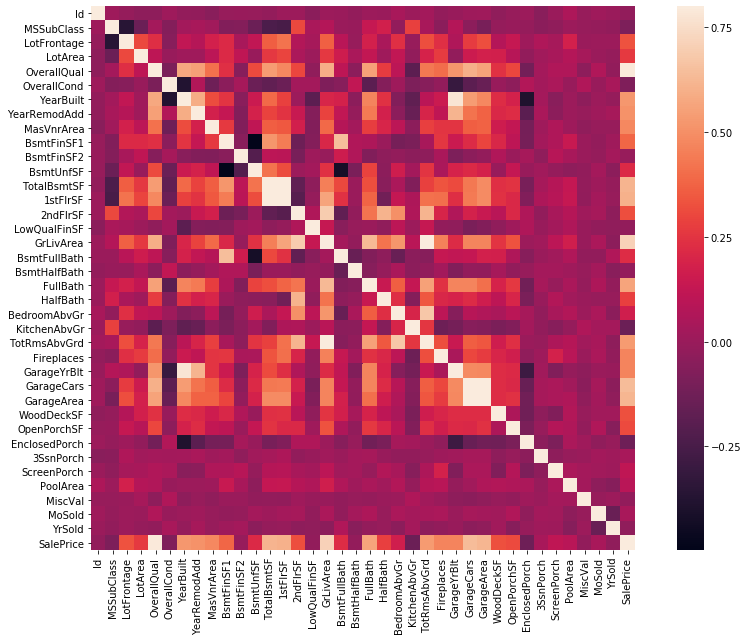

In [29]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

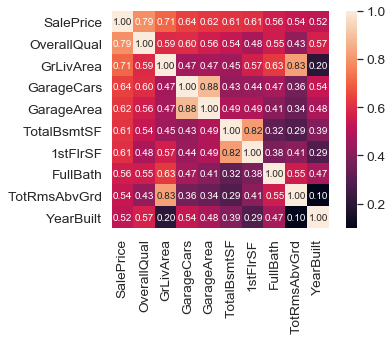

In [30]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [31]:
outlier_det=['OverallQual','GrLivArea','GarageCars','TotalBsmtSF', 'TotRmsAbvGrd','YearBuilt','SalePrice']

In [32]:
outlier=(df_train[outlier_det])
outlier.shape

(1451, 7)

In [33]:
q1=outlier.quantile(0.25)
q3=outlier.quantile(0.75)

In [34]:
IQR=q3-q1
print(IQR)

OverallQual         2.0
GrLivArea         648.0
GarageCars          1.0
TotalBsmtSF       502.5
TotRmsAbvGrd        2.0
YearBuilt          46.0
SalePrice       84100.0
dtype: float64


In [35]:
print( (outlier < (q1-1.5*IQR)) | (outlier > (q3 + 1.5*IQR)))

      OverallQual  GrLivArea  GarageCars  TotalBsmtSF  TotRmsAbvGrd  \
0           False      False       False        False         False   
1           False      False       False        False         False   
2           False      False       False        False         False   
3           False      False       False        False         False   
4           False      False       False        False         False   
5           False      False       False        False         False   
6           False      False       False        False         False   
7           False      False       False        False         False   
8           False      False       False        False         False   
9           False      False       False        False         False   
10          False      False       False        False         False   
11          False      False       False        False          True   
12          False      False       False        False         False   
13    

In [36]:
df_train1 = outlier[~((outlier < (q1 - 1.5 * IQR)) |(outlier > (q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
df_train1.shape

(1311, 7)

In [38]:
rel_cols=['OverallQual','GrLivArea','TotRmsAbvGrd','TotalBsmtSF', 'YearBuilt']

In [39]:
imp=(df_train1[rel_cols])
imp_log=np.log(df_train1[rel_cols])

In [40]:
target=(df_train1['SalePrice'])
target_log=np.log(df_train1['SalePrice'])


In [41]:
rel_all_column = list(imp.columns)
rel_numeric_col = list(imp._get_numeric_data().columns )
rel_categorical_columns =  list(set(rel_all_column) - set(rel_numeric_col))
print(rel_numeric_col)
print(rel_categorical_columns)

['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']
[]


In [42]:
#since all the related variables are continuous

In [43]:
#Random Forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
x_train,x_test,y_train,y_test = train_test_split(imp,target,test_size = 0.30)

In [70]:
rm=RandomForestRegressor(max_depth=6,n_estimators=100)

In [71]:
rm.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [72]:
rm_y_pred=rm.predict(x_test)

In [105]:
#Ada Boost regression
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(learning_rate=0.7)

In [106]:
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.7, loss='linear',
                  n_estimators=50, random_state=None)

In [107]:
abr_y_pred=abr.predict(x_test)

In [108]:
#Gbm Regression
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_depth=6)

In [109]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
gbr_y_pred=gbr.predict(x_test)

In [136]:
#xgboost regressor
from xgboost import XGBRegressor
xgbr=XGBRegressor(learning_rate=0.1)

In [137]:
xgbr.fit(x_train,y_train)

[16:26:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [138]:
xgbr_y_pred=xgbr.predict(x_test)

In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
rmse_rm=np.sqrt(mean_squared_error(rm_y_pred,y_test))
rmse_xgbr=np.sqrt(mean_squared_error(xgbr_y_pred,y_test))
rmse_agb=np.sqrt(mean_squared_error(abr_y_pred,y_test))
rmse_gbr=np.sqrt(mean_squared_error(gbr_y_pred,y_test))

In [143]:
print('random forest={0:.2f}'.format(rmse_rm))
print('xgboost={0:.2f}'.format(rmse_xgbr))
print('adaboost={0:.2f}'.format(rmse_agb))
print('gradient boosting={0:.2f}'.format(rmse_gbr))

random forest=24662.65
xgboost=23515.95
adaboost=27441.01
gradient boosting=24764.45
